In [99]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg19 import VGG19
import sys, glob, math, os
import cv2
import numpy as np
import re


In [100]:
# image sizes
img_rows, img_cols = 224, 224

In [5]:
def vgg19_lower_model():
    # initial model, load vgg19
    vgg19 = VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)
    vgg19.summary()

    # new model that takes first 10 layers of VGG19
    model = Sequential()
    model.add(vgg19.get_layer('input_1'))
    model.add(vgg19.get_layer('block1_conv1'))
    model.add(vgg19.get_layer('block1_conv2'))
    model.add(vgg19.get_layer('block1_pool'))
    model.add(vgg19.get_layer('block2_conv1'))
    model.add(vgg19.get_layer('block2_conv2'))
    model.add(vgg19.get_layer('block2_pool'))
    model.add(vgg19.get_layer('block3_conv1'))
    model.add(vgg19.get_layer('block3_conv2'))
    model.add(vgg19.get_layer('block3_conv3'))
    model.add(vgg19.get_layer('block3_conv4'))
    model.add(vgg19.get_layer('block3_pool'))
    model.add(vgg19.get_layer('block4_conv1'))
    model.add(vgg19.get_layer('block4_conv2'))
    model.add(vgg19.get_layer('block4_conv3'))
    model.add(vgg19.get_layer('block4_conv4'))
    model.add(vgg19.get_layer('block4_pool'))
    model.add(vgg19.get_layer('block5_conv1'))
    model.add(vgg19.get_layer('block5_conv2'))
    model.add(vgg19.get_layer('block5_conv3'))
    model.add(vgg19.get_layer('block5_conv4'))
    model.add(vgg19.get_layer('block5_pool'))
    model.add(Flatten())
    model.summary()
 
    return model
#END vgg19_lower_model()

In [6]:
def load_imgs(dir,normalize=0):
    # load image data from dir

    data = []
    fname = []
    path  = dir + '/scene*.JPG'
    files = sorted(glob.glob(path))

    for fl in files:
        flbase = os.path.basename(fl)
        print('reading %s'%format(fl))

        img = cv2.imread(fl)
        img = cv2.resize(img, (img_rows,img_cols))
        img = np.array(img, dtype=np.float32)
        if normalize == 1:
            img -= np.mean(img)
            img /= np.std(img)

        data.append(img)
        fname.append(fl)

    data = np.array(data,dtype=np.float32)

    return data, fname
# end of load_imgs

In [68]:
def get_id_from_fname(str):
    
    m = re.match(r"([a-z/]+)([0-9]+)([a-z]+).[a-zA-Z]",str)

    if m:
    #    print("found!")
        id = int(m.group(2))
    #    print(id)
    else:
    #    print("not found!")
        id = -1
    
    return id
#end of get_id_from_frame

In [114]:
def angular_distance(vec1,vec2):
    v1 = vec1 / np.linalg.norm(vec1)
    v2 = vec2 / np.linalg.norm(vec2)
    
    return np.dot(v1,v2)
#end of angular_distance

In [7]:
#if __name__=='__main__':
#    argv = sys.argv
#
#    if len(argv) < 2:
#        print('usage: %s [dir]' % argv[0])
#        exit(0)

data,fname = load_imgs('scenes',1) 

print(data.shape)
#print(np.size(data2))
model = vgg19_lower_model()
out = model.predict(data, batch_size=32, verbose=1)
#cv2.waitKey(0)

print(out.shape)


reading scenes/scene007a.JPG
reading scenes/scene007b.JPG
reading scenes/scene007c.JPG
reading scenes/scene007d.JPG
reading scenes/scene007e.JPG
reading scenes/scene007f.JPG
reading scenes/scene007g.JPG
reading scenes/scene008a.JPG
reading scenes/scene008b.JPG
reading scenes/scene009a.JPG
reading scenes/scene009b.JPG
reading scenes/scene009c.JPG
reading scenes/scene009d.JPG
reading scenes/scene009e.JPG
reading scenes/scene009f.JPG
reading scenes/scene010a.JPG
reading scenes/scene010b.JPG
reading scenes/scene010c.JPG
reading scenes/scene010d.JPG
reading scenes/scene011a.JPG
reading scenes/scene011b.JPG
reading scenes/scene011c.JPG
reading scenes/scene012a.JPG
reading scenes/scene012b.JPG
reading scenes/scene012c.JPG
reading scenes/scene012d.JPG
reading scenes/scene013a.JPG
reading scenes/scene013b.JPG
reading scenes/scene013c.JPG
reading scenes/scene013d.JPG
reading scenes/scene014a.JPG
reading scenes/scene014b.JPG
reading scenes/scene014c.JPG
reading scenes/scene014d.JPG
reading scenes

184/184 [==============================] - 4s     
(184, 25088)


In [102]:
np.savetxt("result.csv", out, delimiter=",")
f = open('result-fname.txt', 'w')
id = []

for i in range(0,len(fname)):
    f.write(fname[i]+'\n')
    r = get_id_from_fname(fname[i])
    if r:
        id.append(r)
    else:
        print("cannot retrieve id from" + format(fname[i]))
    
f.close() 


In [103]:
print(out.shape)
print(id)

(184, 25088)
[7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 30, 31, 31, 31, 31, 32, 32, 32, 32, 32, -1, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44]


In [131]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(out)
X_pca = pca.transform(out)
X_pca.shape

(184, 100)

[[ -4.77633579e-03   4.67638056e-05   1.53987389e-03 ...,  -1.98899739e-04
   -7.89131969e-03  -1.79576080e-06]
 [  1.15945544e-02   3.37936479e-04  -8.17109831e-04 ...,   3.08298942e-04
   -4.36592614e-03   3.78249388e-04]
 [  7.67653203e-03   1.96650872e-05  -4.41015931e-03 ...,   1.21608973e-04
   -1.82502612e-03  -4.70062980e-04]
 ..., 
 [ -2.34923158e-02  -1.63937814e-03  -5.08280797e-03 ...,   8.59755848e-04
   -1.09962756e-02   1.82802483e-04]
 [ -4.77329455e-03  -8.84416222e-04   8.25250614e-03 ...,   1.19893113e-03
   -4.31348383e-03  -6.43213396e-04]
 [  1.71755906e-02   9.76217969e-04  -3.59717431e-03 ...,   3.92693141e-03
   -1.20211635e-02   1.62556593e-03]]
(50, 25088)


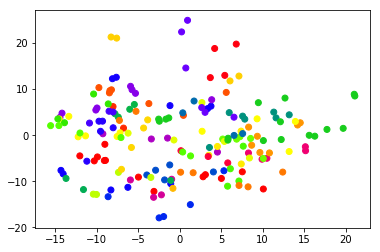

In [108]:
import matplotlib.pyplot as plt

id = np.array(id)
plt.scatter(X_pca[:,1],X_pca[:,2], c=id, cmap='prism')
#plt.scatter(X_pca[:,1],X_pca[:,2])

plt.show()

In [132]:
ndata = id.shape[0]
d = np.zeros([ndata,ndata])

for i in range(0,ndata):
    for j in range(0,ndata):
        d[i,j] = angular_distance(X_pca[i,1:10],X_pca[j,1:10])
        print("%d(%d) - %d(%d) : %f" % (i, id[i], j, id[j], d[i,j]))

0(7) - 0(7) : 1.000000
0(7) - 1(7) : 0.995072
0(7) - 2(7) : 0.654095
0(7) - 3(7) : 0.635624
0(7) - 4(7) : 0.732890
0(7) - 5(7) : 0.706648
0(7) - 6(7) : 0.690838
0(7) - 7(8) : 0.577264
0(7) - 8(8) : 0.589271
0(7) - 9(9) : 0.067162
0(7) - 10(9) : 0.080202
0(7) - 11(9) : 0.057649
0(7) - 12(9) : 0.045774
0(7) - 13(9) : 0.665418
0(7) - 14(9) : 0.598409
0(7) - 15(10) : 0.695958
0(7) - 16(10) : 0.633213
0(7) - 17(10) : 0.556908
0(7) - 18(10) : 0.576076
0(7) - 19(11) : 0.488576
0(7) - 20(11) : 0.575433
0(7) - 21(11) : 0.547494
0(7) - 22(12) : 0.140677
0(7) - 23(12) : 0.115830
0(7) - 24(12) : 0.000856
0(7) - 25(12) : -0.036664
0(7) - 26(13) : -0.197462
0(7) - 27(13) : -0.187079
0(7) - 28(13) : 0.067195
0(7) - 29(13) : 0.075663
0(7) - 30(14) : 0.781662
0(7) - 31(14) : 0.798763
0(7) - 32(14) : 0.455460
0(7) - 33(14) : 0.450758
0(7) - 34(15) : 0.659938
0(7) - 35(15) : 0.671931
0(7) - 36(15) : 0.017583
0(7) - 37(15) : 0.038489
0(7) - 38(15) : 0.143869
0(7) - 39(16) : -0.191835
0(7) - 40(16) : -0.20

14(9) - 32(14) : 0.532295
14(9) - 33(14) : 0.590941
14(9) - 34(15) : 0.529660
14(9) - 35(15) : 0.556257
14(9) - 36(15) : 0.062296
14(9) - 37(15) : 0.045710
14(9) - 38(15) : 0.079284
14(9) - 39(16) : -0.385919
14(9) - 40(16) : -0.392954
14(9) - 41(16) : -0.296234
14(9) - 42(16) : -0.301262
14(9) - 43(16) : -0.294668
14(9) - 44(17) : -0.242588
14(9) - 45(17) : -0.298450
14(9) - 46(17) : -0.245264
14(9) - 47(17) : -0.082446
14(9) - 48(17) : -0.234761
14(9) - 49(17) : -0.317017
14(9) - 50(17) : -0.326787
14(9) - 51(18) : -0.369074
14(9) - 52(18) : -0.542344
14(9) - 53(18) : -0.511336
14(9) - 54(18) : -0.334655
14(9) - 55(18) : -0.415397
14(9) - 56(19) : 0.292971
14(9) - 57(19) : 0.175843
14(9) - 58(19) : 0.019255
14(9) - 59(19) : 0.095070
14(9) - 60(19) : 0.175585
14(9) - 61(20) : 0.287647
14(9) - 62(20) : 0.550684
14(9) - 63(20) : -0.074313
14(9) - 64(20) : 0.298807
14(9) - 65(21) : 0.031080
14(9) - 66(21) : 0.201239
14(9) - 67(21) : 0.598949
14(9) - 68(21) : 0.067147
14(9) - 69(21) : 0.0

27(13) - 147(35) : -0.366382
27(13) - 148(35) : -0.376753
27(13) - 149(36) : 0.025869
27(13) - 150(36) : -0.204288
27(13) - 151(36) : -0.125317
27(13) - 152(36) : 0.020320
27(13) - 153(37) : 0.089421
27(13) - 154(38) : -0.190795
27(13) - 155(38) : -0.165404
27(13) - 156(38) : -0.307590
27(13) - 157(38) : -0.237604
27(13) - 158(39) : -0.021792
27(13) - 159(39) : 0.403361
27(13) - 160(39) : 0.123603
27(13) - 161(39) : 0.477121
27(13) - 162(40) : -0.287834
27(13) - 163(40) : -0.646351
27(13) - 164(40) : -0.473468
27(13) - 165(41) : -0.171472
27(13) - 166(41) : 0.301498
27(13) - 167(41) : -0.296589
27(13) - 168(41) : -0.140926
27(13) - 169(41) : -0.115173
27(13) - 170(42) : 0.163724
27(13) - 171(42) : -0.669536
27(13) - 172(42) : -0.150036
27(13) - 173(42) : -0.122165
27(13) - 174(43) : -0.382518
27(13) - 175(43) : -0.516703
27(13) - 176(43) : -0.146746
27(13) - 177(43) : 0.015532
27(13) - 178(44) : -0.010596
27(13) - 179(44) : 0.319770
27(13) - 180(44) : -0.457576
27(13) - 181(44) : -0.43

50(17) - 108(27) : 0.719231
50(17) - 109(27) : 0.705849
50(17) - 110(27) : 0.403868
50(17) - 111(27) : 0.829264
50(17) - 112(27) : 0.206636
50(17) - 113(27) : 0.177652
50(17) - 114(27) : 0.432041
50(17) - 115(28) : -0.582314
50(17) - 116(28) : -0.580200
50(17) - 117(28) : -0.122835
50(17) - 118(28) : -0.417989
50(17) - 119(28) : -0.416137
50(17) - 120(29) : -0.306020
50(17) - 121(29) : 0.093998
50(17) - 122(29) : -0.058541
50(17) - 123(30) : -0.106691
50(17) - 124(31) : -0.185241
50(17) - 125(31) : -0.209069
50(17) - 126(31) : -0.181727
50(17) - 127(31) : -0.142825
50(17) - 128(32) : -0.434038
50(17) - 129(32) : -0.104959
50(17) - 130(32) : -0.051611
50(17) - 131(32) : 0.272797
50(17) - 132(32) : 0.017979
50(17) - 133(-1) : -0.264335
50(17) - 134(33) : -0.462724
50(17) - 135(33) : -0.227738
50(17) - 136(33) : -0.168971
50(17) - 137(33) : -0.171530
50(17) - 138(34) : -0.467270
50(17) - 139(34) : -0.411647
50(17) - 140(34) : -0.303401
50(17) - 141(34) : -0.264551
50(17) - 142(34) : 0.037

73(22) - 64(20) : -0.130295
73(22) - 65(21) : 0.330841
73(22) - 66(21) : 0.115161
73(22) - 67(21) : -0.248384
73(22) - 68(21) : -0.080855
73(22) - 69(21) : -0.104108
73(22) - 70(21) : 0.361858
73(22) - 71(21) : -0.382146
73(22) - 72(22) : 0.055245
73(22) - 73(22) : 1.000000
73(22) - 74(22) : -0.337898
73(22) - 75(22) : 0.451073
73(22) - 76(22) : 0.266961
73(22) - 77(23) : -0.001148
73(22) - 78(23) : 0.370601
73(22) - 79(23) : 0.376478
73(22) - 80(23) : 0.739035
73(22) - 81(23) : 0.652184
73(22) - 82(23) : 0.765675
73(22) - 83(23) : 0.527730
73(22) - 84(24) : -0.002232
73(22) - 85(24) : 0.005823
73(22) - 86(24) : -0.080823
73(22) - 87(24) : 0.644421
73(22) - 88(24) : 0.391670
73(22) - 89(24) : 0.389605
73(22) - 90(25) : 0.327225
73(22) - 91(25) : 0.227081
73(22) - 92(25) : 0.237351
73(22) - 93(25) : 0.288761
73(22) - 94(26) : 0.336964
73(22) - 95(26) : 0.686783
73(22) - 96(26) : 0.664723
73(22) - 97(26) : 0.623225
73(22) - 98(27) : -0.292287
73(22) - 99(27) : -0.259564
73(22) - 100(27) 

93(25) - 135(33) : 0.752418
93(25) - 136(33) : 0.669428
93(25) - 137(33) : 0.692793
93(25) - 138(34) : 0.062689
93(25) - 139(34) : -0.004730
93(25) - 140(34) : 0.634188
93(25) - 141(34) : 0.615984
93(25) - 142(34) : 0.424395
93(25) - 143(34) : 0.468644
93(25) - 144(34) : 0.443862
93(25) - 145(35) : 0.334865
93(25) - 146(35) : 0.516425
93(25) - 147(35) : 0.281383
93(25) - 148(35) : 0.276873
93(25) - 149(36) : -0.370623
93(25) - 150(36) : 0.133507
93(25) - 151(36) : 0.148060
93(25) - 152(36) : -0.252883
93(25) - 153(37) : -0.242122
93(25) - 154(38) : -0.013722
93(25) - 155(38) : -0.068963
93(25) - 156(38) : 0.624692
93(25) - 157(38) : 0.166543
93(25) - 158(39) : -0.267202
93(25) - 159(39) : -0.202692
93(25) - 160(39) : -0.110871
93(25) - 161(39) : 0.099564
93(25) - 162(40) : 0.173443
93(25) - 163(40) : 0.463246
93(25) - 164(40) : 0.066133
93(25) - 165(41) : -0.472700
93(25) - 166(41) : -0.441371
93(25) - 167(41) : 0.148970
93(25) - 168(41) : -0.202365
93(25) - 169(41) : -0.351480
93(25) 

114(27) - 137(33) : -0.189677
114(27) - 138(34) : -0.382958
114(27) - 139(34) : -0.278049
114(27) - 140(34) : -0.447720
114(27) - 141(34) : -0.343603
114(27) - 142(34) : 0.039573
114(27) - 143(34) : -0.033960
114(27) - 144(34) : -0.030154
114(27) - 145(35) : -0.231637
114(27) - 146(35) : -0.079195
114(27) - 147(35) : -0.163971
114(27) - 148(35) : -0.142347
114(27) - 149(36) : 0.065768
114(27) - 150(36) : 0.046023
114(27) - 151(36) : 0.172033
114(27) - 152(36) : -0.075393
114(27) - 153(37) : 0.019562
114(27) - 154(38) : -0.170460
114(27) - 155(38) : -0.171869
114(27) - 156(38) : 0.344317
114(27) - 157(38) : 0.013054
114(27) - 158(39) : 0.498305
114(27) - 159(39) : 0.465863
114(27) - 160(39) : 0.720503
114(27) - 161(39) : 0.930581
114(27) - 162(40) : -0.318242
114(27) - 163(40) : -0.288498
114(27) - 164(40) : -0.539662
114(27) - 165(41) : -0.186518
114(27) - 166(41) : -0.213423
114(27) - 167(41) : -0.438434
114(27) - 168(41) : -0.435605
114(27) - 169(41) : -0.398031
114(27) - 170(42) : -

131(32) - 4(7) : -0.065918
131(32) - 5(7) : -0.315446
131(32) - 6(7) : -0.352572
131(32) - 7(8) : -0.089881
131(32) - 8(8) : -0.139879
131(32) - 9(9) : -0.106794
131(32) - 10(9) : -0.108063
131(32) - 11(9) : -0.296992
131(32) - 12(9) : -0.304985
131(32) - 13(9) : -0.035136
131(32) - 14(9) : 0.031310
131(32) - 15(10) : -0.452304
131(32) - 16(10) : -0.568340
131(32) - 17(10) : -0.689591
131(32) - 18(10) : -0.739826
131(32) - 19(11) : -0.352699
131(32) - 20(11) : -0.457365
131(32) - 21(11) : -0.500838
131(32) - 22(12) : 0.065468
131(32) - 23(12) : 0.087220
131(32) - 24(12) : 0.228479
131(32) - 25(12) : 0.230761
131(32) - 26(13) : -0.474201
131(32) - 27(13) : -0.495862
131(32) - 28(13) : -0.827704
131(32) - 29(13) : -0.834094
131(32) - 30(14) : -0.300170
131(32) - 31(14) : -0.309758
131(32) - 32(14) : -0.149946
131(32) - 33(14) : -0.434424
131(32) - 34(15) : -0.199763
131(32) - 35(15) : -0.197772
131(32) - 36(15) : 0.411242
131(32) - 37(15) : 0.392868
131(32) - 38(15) : 0.133627
131(32) - 

152(36) - 178(44) : -0.508642
152(36) - 179(44) : -0.459973
152(36) - 180(44) : -0.559148
152(36) - 181(44) : -0.560328
152(36) - 182(44) : -0.004445
152(36) - 183(44) : -0.006461
153(37) - 0(7) : -0.370999
153(37) - 1(7) : -0.414021
153(37) - 2(7) : -0.144237
153(37) - 3(7) : -0.100509
153(37) - 4(7) : -0.185868
153(37) - 5(7) : -0.034412
153(37) - 6(7) : 0.015726
153(37) - 7(8) : -0.220325
153(37) - 8(8) : -0.234211
153(37) - 9(9) : 0.064954
153(37) - 10(9) : 0.067776
153(37) - 11(9) : 0.604294
153(37) - 12(9) : 0.585049
153(37) - 13(9) : -0.206340
153(37) - 14(9) : -0.167381
153(37) - 15(10) : 0.044559
153(37) - 16(10) : 0.110130
153(37) - 17(10) : 0.129527
153(37) - 18(10) : 0.172599
153(37) - 19(11) : -0.460299
153(37) - 20(11) : -0.090509
153(37) - 21(11) : -0.021089
153(37) - 22(12) : 0.396300
153(37) - 23(12) : 0.398266
153(37) - 24(12) : 0.017598
153(37) - 25(12) : 0.037563
153(37) - 26(13) : 0.112496
153(37) - 27(13) : 0.089421
153(37) - 28(13) : 0.425718
153(37) - 29(13) : 0

174(43) - 140(34) : -0.040644
174(43) - 141(34) : -0.093170
174(43) - 142(34) : -0.013757
174(43) - 143(34) : 0.104549
174(43) - 144(34) : 0.103206
174(43) - 145(35) : 0.490183
174(43) - 146(35) : 0.580328
174(43) - 147(35) : 0.335237
174(43) - 148(35) : 0.321904
174(43) - 149(36) : 0.179573
174(43) - 150(36) : -0.001507
174(43) - 151(36) : -0.089529
174(43) - 152(36) : -0.418024
174(43) - 153(37) : -0.485445
174(43) - 154(38) : 0.008532
174(43) - 155(38) : 0.018868
174(43) - 156(38) : 0.023764
174(43) - 157(38) : 0.839608
174(43) - 158(39) : -0.539043
174(43) - 159(39) : -0.338018
174(43) - 160(39) : -0.107362
174(43) - 161(39) : -0.205826
174(43) - 162(40) : 0.872428
174(43) - 163(40) : 0.700209
174(43) - 164(40) : 0.587708
174(43) - 165(41) : 0.533639
174(43) - 166(41) : 0.524179
174(43) - 167(41) : 0.667687
174(43) - 168(41) : -0.100685
174(43) - 169(41) : -0.118058
174(43) - 170(42) : 0.220131
174(43) - 171(42) : 0.523684
174(43) - 172(42) : 0.274476
174(43) - 173(42) : 0.262652
1

In [129]:
print(d.shape)

(184, 184)


In [136]:
NUM_CANDIDATE = 2
n_found = 0

for i in range(0,ndata):
    myid = id[i]
    n_match = 0
    
    for j in range(0,NUM_CANDIDATE):
        other_id = id[np.argsort(d[i,:])[::-1][j]]
        if other_id == myid:
            n_match = n_match + 1
    
    # print("%d : found %d" % (i, n_match))
    if n_match > 1:
        n_found = n_found + 1

print("Found %d / %d (%f )" % (n_found,ndata,n_found/ndata))
    

Found 127 / 184 (0.690217 )


In [ ]:
#
# save pca data for dnn proessing
#

# data standlization
data_for_cluster = np.reshape(data,(data.shape[0]*data.shape[1],data.shape[2]))

# standlization step
me = np.mean(data_for_cluster,0)
stv = np.std(data_for_cluster - me,0)
#stv2 = np.std(data_for_cluster,0)
#print(stv)
#print(stv2)
data_standlized = (data_for_cluster - me) / stv
data_whitened = data_standlized

# whiteneing step
#data_whitened = whiten(data_for_cluster)
#print(data_whitened)
#print(np.std(data_whitened,0))
centers, distortion = kmeans(data_whitened,200)
print(centers)
print(distortion)
print(data_whitened.shape)

#np.save("data_whitened.npy",data_whitened)
np.save("data",data)
np.save("centers.npy",centers)
np.save("mean.npy",me)
np.save("stv.npy",stv)